In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# we import libraries for this exercise
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler   #or as the above
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('Movies.csv')
dataset.head()

,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,action
1,16,224,drama
2,15,221,thriller_suspense
3,14,202,adventure
4,16,198,adventure


In [3]:
#We define the X
x = dataset.iloc[:,[0,1,2]].values          #including the gender(genre)

###  It has a categorical data (genre)       &     it should be scaled the data as well
####  2 methods in one dataset:

In [4]:
#We create the column transformer

column_transformer = ColumnTransformer([
    ('genre_encoder', OneHotEncoder(), [2]),     #encoded the Genre
    ('scaler', StandardScaler(),[0,1])          # scalling the Budget and the Income
    ])

In [5]:
# Apply transformations in the dataset

x_transformed = column_transformer.fit_transform(x)

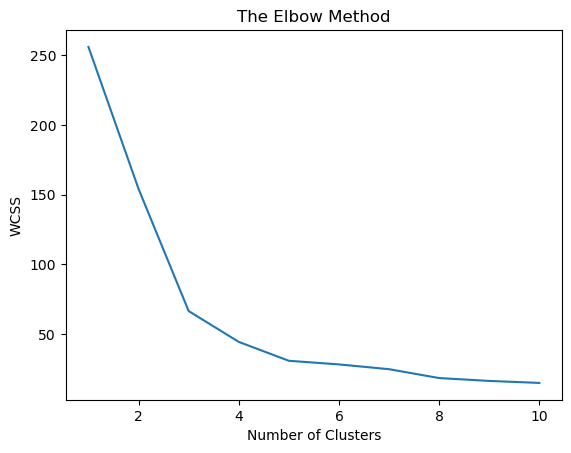

In [6]:
#now it goes to the ELbow method

from sklearn.cluster import KMeans

wcss = []                #wcss = from the formula
for i in range(1,11):       #if I wanna larger, have to increase the numbers
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(x_transformed)                 #only this part (x_transformed) we need to change from the PDA Clustering
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
dataset.head()

,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,action
1,16,224,drama
2,15,221,thriller_suspense
3,14,202,adventure
4,16,198,adventure


In [8]:
#We create our y
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x_transformed)     #same here, change x instead x_transformed in comparision with the PDA Clustering

In [9]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
#Append the y into the dataset
dataset['Movie_Type'] = y

In [11]:
dataset

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
0,13,230,action,2
1,16,224,drama,2
2,15,221,thriller_suspense,2
3,14,202,adventure,2
4,16,198,adventure,2
...,...,...,...,...
95,37,16,adventure,0
96,32,19,action,0
97,31,17,action,0
98,26,16,western,0


In [12]:
# WE CAN EXPLORE THE CLUSTER TO SEE THE CONTENT INSIDE

In [13]:
# we can explore the clusters to see the context inside:

cluster_0 = dataset[dataset['Movie_Type']== 0]
cluster_0.head()

#low budget and Low Income

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
34,13,12,action,0
51,8,4,adventure,0
52,9,10,adventure,0
53,8,7,adventure,0
54,9,9,adventure,0


In [14]:
cluster_1 = dataset[dataset['Movie_Type']== 1]
cluster_1.head()

#high budget and Low Income

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
35,230,16,action,1
36,224,15,adventure,1
37,221,14,adventure,1
38,202,16,adventure,1
39,198,14,action,1


In [15]:
cluster_2 = dataset[dataset['Movie_Type']== 2]
cluster_2.head()

#high budget and high Income

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
0,13,230,action,2
1,16,224,drama,2
2,15,221,thriller_suspense,2
3,14,202,adventure,2
4,16,198,adventure,2


In [16]:
# the above is showing up high/low income, high/low budget, and high/low movie